🔹 1. House Price Prediction
🧩 Problem Statement:Predict house prices based on features like area, number of bedrooms, bathrooms, and location.
📦 Dataset:Housing.csv from Kaggle or UCI ML repository
🎯 Features:
Area (sqft)
Bedrooms
Bathrooms
Parking
Location (encoded)
💡 Real-life use:
Help buyers/sellers estimate the fair price.
Guide real estate agents in dynamic pricing.

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
      

c:\Users\khans\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


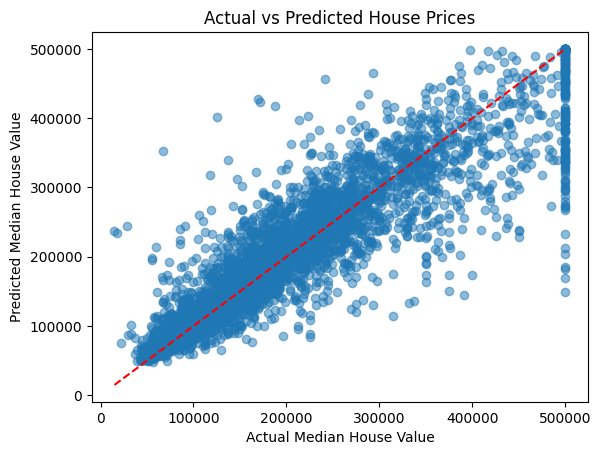

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv("Housing.csv")

# Preview columns & data
print(df.head())
print(df.columns)

# Encode categorical 'ocean_proximity'
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

# Select features and target
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
            'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
X = df[features]
y = df['median_house_value']

# Handle missing values if any (e.g., in total_bedrooms)
X = X.fillna(X.median())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate function
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R²:", r2_score(y_test, preds))

# Evaluate
evaluate_model(model, X_test, y_test)

# Sample prediction
sample = [[-122.23, 37.88, 41, 880, 129, 322, 126, 8.3252, 1]]  # example with encoded ocean_proximity=1
sample_scaled = scaler.transform(sample)
pred_price = model.predict(sample_scaled)
print(f"Predicted house value: ${pred_price[0]:,.2f}")

# Plot actual vs predicted
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


🔹 2. Student Performance Prediction
🧩 Problem Statement:Predict final exam scores of students based on study hours, attendance, and previous marks.
📦 Dataset:StudentPerformance.csv from Kaggle
🎯 Features:
Hours of study
Attendance rate
Parental education
Previous term marks
💡 Real-life use:
Academic performance monitoring.
Tailoring support for struggling students.

MAE: 3.991043392857143
RMSE: 5.056407806618989
R²: 0.8939192564887288


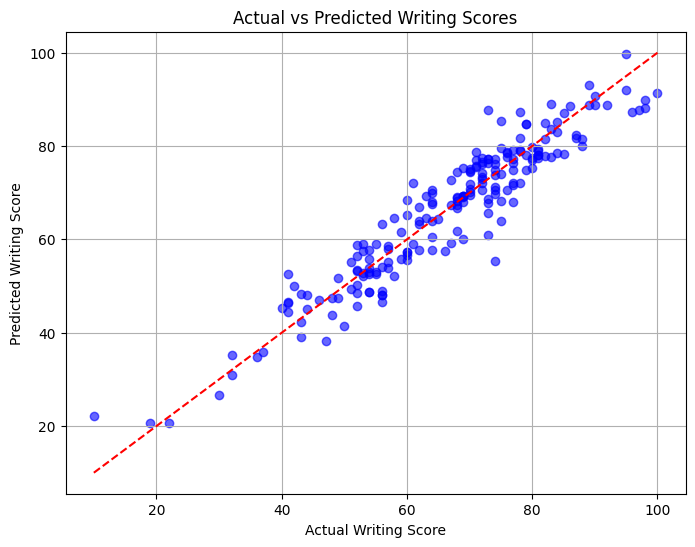


Enter student details to predict writing score:

Parental Education Levels:
0: associate's degree
1: bachelor's degree
2: high school
3: master's degree
4: some college
5: some high school

Predicted Writing Score: 99.14


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('StudentsPerformance.csv')

# Encode categorical feature: parental level of education
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])

# Use 'math score', 'reading score', 'parental level of education' as features to predict 'writing score'
X = df[['math score', 'reading score', 'parental level of education']]
y = df['writing score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Writing Score")
plt.ylabel("Predicted Writing Score")
plt.title("Actual vs Predicted Writing Scores")
plt.grid(True)
plt.show()

# User input for prediction
def get_user_input():
    print("\nEnter student details to predict writing score:")
    math_score = float(input("Math score (0-100): "))
    reading_score = float(input("Reading score (0-100): "))
    print("\nParental Education Levels:")
    for i, val in enumerate(le.classes_):
        print(f"{i}: {val}")
    parental_edu = int(input(f"Choose parental education level (0-{len(le.classes_)-1}): "))
    return [math_score, reading_score, parental_edu]

user_data = get_user_input()

# Wrap user input in DataFrame with column names
user_input_df = pd.DataFrame([user_data], columns=['math score', 'reading score', 'parental level of education'])

# Scale and predict
user_data_scaled = scaler.transform(user_input_df)
predicted_score = model.predict(user_data_scaled)

print(f"\nPredicted Writing Score: {predicted_score[0]:.2f}")


🔹 3. Startup Profit Prediction
🧩 Problem Statement:Predict profit for a startup based on investments in R&D, Marketing, and Administration.
📦 Dataset:50_Startups.csv from Kaggle
🎯 Features:
R&D Spend
Administration Spend
Marketing Spend
State (encoded)

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('50_Startups.csv')

# Encode categorical 'State'
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

# Features and target
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Function for user input and prediction
def predict_profit():
    print("\nEnter startup spending details to predict profit:")

    try:
        rd_spend = float(input("R&D Spend: "))
        admin_spend = float(input("Administration Spend: "))
        marketing_spend = float(input("Marketing Spend: "))
    except ValueError:
        print("Please enter valid numeric values.")
        return

    print("\nStates:")
    for i, state in enumerate(le.classes_):
        print(f"{i}: {state}")

    try:
        state_input = int(input(f"Choose state by number (0-{len(le.classes_)-1}): "))
        if state_input not in range(len(le.classes_)):
            print("Invalid state selection.")
            return
    except ValueError:
        print("Please enter a valid integer for state.")
        return

    # Prepare input as DataFrame with proper columns
    input_df = pd.DataFrame([[rd_spend, admin_spend, marketing_spend, state_input]],
                            columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State'])

    # Scale input and predict
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)

    print(f"\nPredicted Profit: ${prediction[0]:,.2f}")

# Run user input prediction
predict_profit()


MAE: 6979.175746721788
RMSE: 8996.080562722304
R²: 0.9000614254946252

Enter startup spending details to predict profit:

States:
0: California
1: Florida
2: New York

Predicted Profit: $118,056.85
